625/625 [==============================] - 0s 310us/step


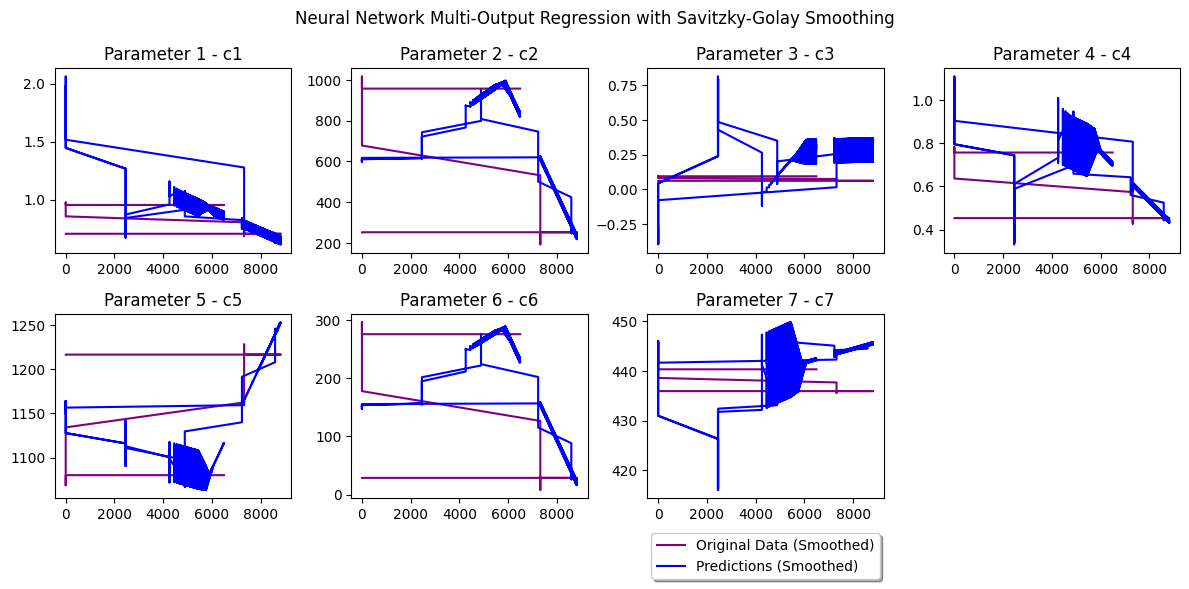

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from scipy.signal import savgol_filter

# Load data from CSV files, skipping the header row
data_folder = "MODEL_DATA/realFD_for_Training/"
X = np.loadtxt(data_folder + "realFD_chd6_chopped.csv", delimiter=",", skiprows=1)
Y = np.loadtxt(data_folder + "expanded_realHardParam_chopped.csv", delimiter=",", skiprows=1)

# Create a simple feedforward neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(7)  # Output layer with 7 neurons for multi-output regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the loaded data
model.fit(X, Y, epochs=100, verbose=0)  # You can adjust the number of epochs

# Make predictions using the trained model
predictions = model.predict(X)

# Define labels for the columns of Y and X
y_labels = ["c1", "c2", "c3", "c4", "c5", "c6", "c7"]

# Plot the original data and predictions for each output dimension with Savitzky-Golay smoothing
plt.figure(figsize=(12, 6))
legend_labels = []  # List to store legend labels

for i in range(Y.shape[1]):
    plt.subplot(2, 4, i + 1)
    
    # Check the size of the data and adjust window_length and polyorder accordingly
    window_length = min(11, len(Y[:, i]))  # Adjust 11 as needed
    polyorder = min(3, window_length - 1)  # polyorder must be less than window_length
    
    # Apply Savitzky-Golay filter to smooth the data and predictions
    smoothed_data = savgol_filter(Y[:, i], window_length=window_length, polyorder=polyorder)
    smoothed_predictions = savgol_filter(predictions[:, i], window_length=window_length, polyorder=polyorder)
    
    # Plot data and predictions with labels
    plt.plot(X[:, 0], smoothed_data, linestyle="solid", color="purple")
    plt.plot(X[:, 0], smoothed_predictions, color="blue")
    plt.title(f"Parameter {i + 1} - {y_labels[i]}")
    legend_labels.extend(["Original Data (Smoothed)", "Predictions (Smoothed)"])

# Add a common legend for all subplots
plt.legend(legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True)

plt.suptitle("Neural Network Multi-Output Regression with Savitzky-Golay Smoothing")
plt.tight_layout()
plt.show()

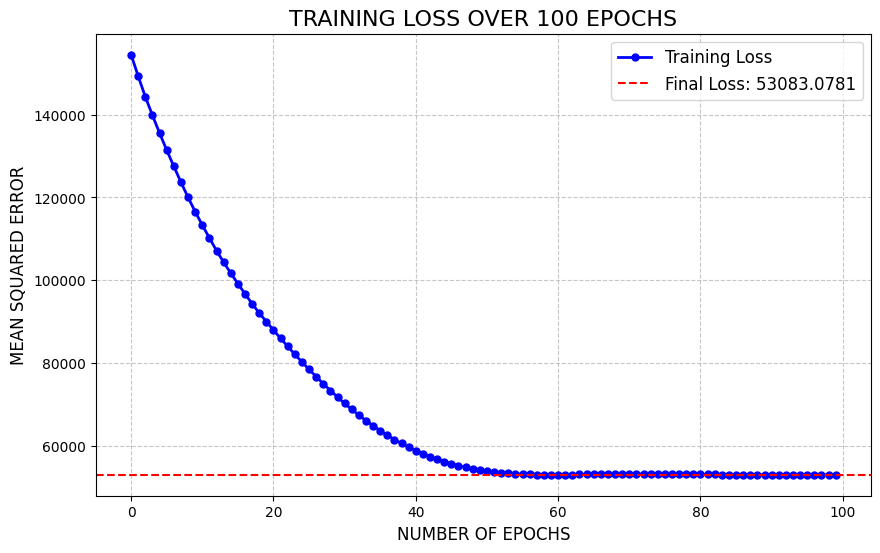

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Load data from CSV files, skipping the header row
data_folder = "MODEL_DATA/realFD_for_Training/"
X = np.loadtxt(data_folder + "realFD_chd6.csv", delimiter=",", skiprows=1)
Y = np.loadtxt(data_folder + "expanded_realHardParam.csv", delimiter=",", skiprows=1)

# Create a simple feedforward neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(7)  # Output layer with 7 neurons for multi-output regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the loaded data and store the training history
history = model.fit(X, Y, epochs=100, verbose=0)  

# Get the final loss value
final_loss = history.history['loss'][-1]

# Create a fancier loss function plot
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue', linestyle='-', linewidth=2, marker='o', markersize=5)
plt.axhline(y=final_loss, color='red', linestyle='--', label=f'Final Loss: {final_loss:.4f}')
plt.title('TRAINING LOSS OVER 100 EPOCHS', fontsize=16)
plt.xlabel('NUMBER OF EPOCHS', fontsize=12)
plt.ylabel('MEAN SQUARED ERROR', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()